In [1]:
using ApproxFun, SingularIntegralEquations, Plots,Interact,Reactive; gadfly();

    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /Users/Mikael/.julia/v0.4/Interact/src/IJulia/setup.jl:99
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Any) at replutil.jl:4.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Reactive.Signal)
before the new definition.


# Benjamin-Ono equation with periodic boundary conditions $$u_t+uu_x+H\{u_{xx}\}=0$$

[Plots.jl] Initializing backend: gadfly


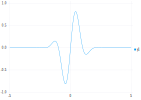

In [2]:
a,b = -5,5
u0,t=Fun(x->sinpi(x)*exp(-x^2),Laurent(PeriodicInterval(a,b))),0.0
sp=space(u0);D=Derivative(sp);H=Hilbert(sp)
L = -H*D^2
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(real(y);xlims=(a,b),ylims=(-1.,1.)).o,x)

In [3]:
u0,t=ETDRK4(L,N,u0,t,0.01,200,x,1e-8);

# Here is a 1-periodic wave solution

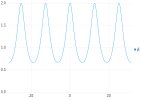

In [4]:
a,b = -10π,10π
u0,t=Fun(x->1/(1-0.5cos(x/2)),Laurent(PeriodicInterval(a,b))),0.0
sp=space(u0);D=Derivative(sp);H=Hilbert(sp)
L = -H*D^2
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(real(y);xlims=(a,b),ylims=(-0.,2.)).o,x)

In [5]:
# It moves very slowly to the right.
u0,t=ETDRK4(L,N,u0,t,0.01,200,x,1e-8);

# Benjamin-Ono equation integrable on $\mathbb{R}$, $$u_t+uu_x+H\{u_{xx}\}=0$$

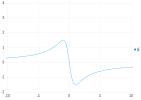

In [6]:
a,b = -10,10
sp,spd = Laurent(PeriodicLine()),LaurentDirichlet(PeriodicLine())
u0=Fun(x->-3x/(1+x^2),spd)
H=Hilbert(spd);D=Derivative(spd);
L = -D^2*H
N(u) = -u*u'
x=Signal(u0);map(y->plot(real(y);xlims=(a,b),ylims=(-2.,4.)).o,x)

In [7]:
u0=BDF2(L,N,u0,0.01,100,x,1e-8);